# Funciones de Distribución de probabilidad 

### Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100020.,  99982.,  99962., 100344., 100086., 100218.,  99529.,
         99940.,  99557., 100362.]),
 array([ 1.00012716, 10.90010543, 20.8000837 , 30.70006197, 40.60004024,
        50.50001851, 60.39999678, 70.29997505, 80.19995333, 90.0999316 ,
        99.99990987]),
 <BarContainer object of 10 artists>)

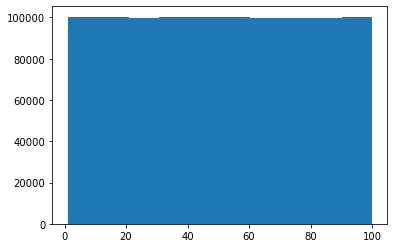

In [3]:
%matplotlib inline
plt.hist(data)

### Distribución Normal  (randn)

In [4]:
data = np.random.randn(1000000)

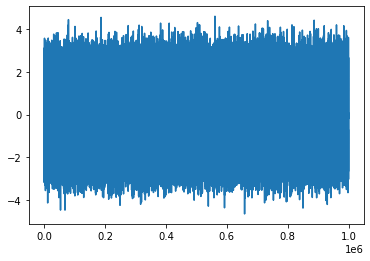

In [5]:
x = range(1, 1000001)
plt.plot(x , data)

(array([6.70000e+01, 2.49000e+03, 2.74210e+04, 1.40296e+05, 3.20547e+05,
        3.26769e+05, 1.49429e+05, 3.00570e+04, 2.80100e+03, 1.23000e+02]),
 array([-4.66664321, -3.73776993, -2.80889664, -1.88002336, -0.95115008,
        -0.0222768 ,  0.90659649,  1.83546977,  2.76434305,  3.69321633,
         4.62208962]),
 <BarContainer object of 10 artists>)

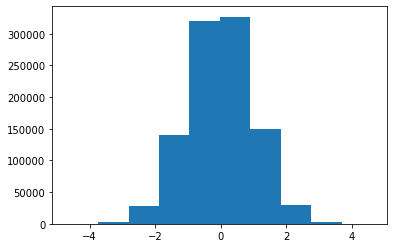

In [6]:
%matplotlib inline
plt.hist(data)

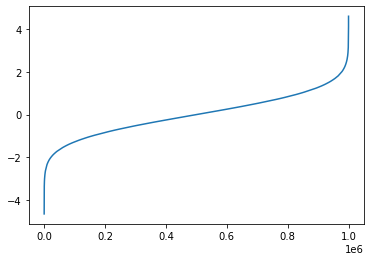

In [7]:
plt.plot(x, sorted(data))

(array([   5.,   60.,  354., 1247., 2471., 2962., 1973.,  761.,  149.,
          18.]),
 array([-4.55660591, -2.64254389, -0.72848187,  1.18558016,  3.09964218,
         5.01370421,  6.92776623,  8.84182825, 10.75589028, 12.6699523 ,
        14.58401432]),
 <BarContainer object of 10 artists>)

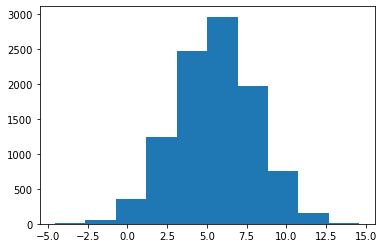

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu +sd*Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd*Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[ 0.56960165,  0.90271108,  0.02987294, -1.04592404],
       [ 0.7747117 ,  0.26681003,  0.98372584,  1.1734248 ]])

In [10]:
data = np.random.randn()
data

-1.8736391327986244

## La simulación de Monte Carlo (para simular el calculo del valor de pi) 

* Generar 2 numeros aleatorios uniforme x e y entre 0 y 1 en total 1000 veces
* Calcular x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del circulo
    * Si el valor es superior a 1 -> estamos fuera del circulo
* Calculamos el numero total de veces que estan dentro del circulo y lo dividimos entre el numero total de intentos para
obtener una aproximacion de la probabilidad de caer dentro del circulo
* Usamos dicha probabidad para aproximar el valor de pi
* Repetimos el experimento un numero suficiente de veces (por ejmplo 100), para obtener (100) diferentes aproximaciones de pi.
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de pi.


3.1412800000000014


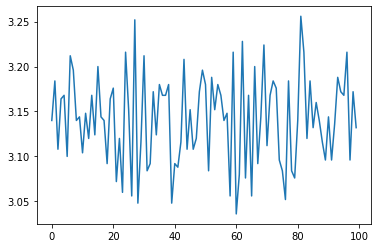

In [31]:
pi_avg = 0
n = 1000
n_exp = 100
pi_value_list = []
for i in range(100):
    value = 0
    x = np.random.uniform(0,1,n).tolist()
    y = np.random.uniform(0,1,n).tolist()
    for j in range(n):
        z = np.sqrt(x[j] * x[j] + y[j] * y[j])
        if z <= 1:
            value += 1
    float_value = float(value)
    pi_value = float_value * 4 / n
    pi_value_list.append(pi_value)
    pi_avg += pi_value
    
pi = pi_avg/n_exp

print(pi)
plt.plot(pi_value_list)

In [35]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z <= 1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.142601999999999


(3.142601999999999, [<matplotlib.lines.Line2D at 0x1e459432700>])

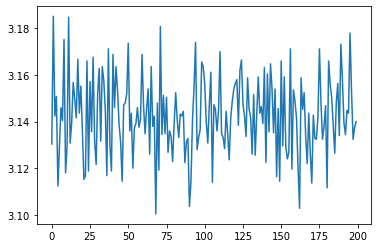

In [36]:
pi_montecarlo(10000, 200)

### Dummy Data Sets 

In [4]:
n = 1000000
data =pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5,32,n)
    }
)

In [5]:
data

A         B          C
0       1.905933  1.111563  26.465971
1       1.226606  4.215805  13.116105
2       1.156167 -0.488322  23.104893
3      -0.780498  2.817443   9.745385
4       1.686463  2.204259  14.479148
...          ...       ...        ...
999995 -0.478498  2.816186  10.236953
999996  0.645526  2.417658   9.497496
999997  1.441994  0.344511  11.535249
999998  0.361238  0.787645   5.244182
999999  1.021976  1.088370  10.135809

[1000000 rows x 3 columns]

In [6]:
data.describe()

A               B               C
count  1000000.000000  1000000.000000  1000000.000000
mean        -0.000577        1.499880       18.494943
std          0.998850        2.501206        7.790342
min         -4.762046      -11.181825        5.000035
25%         -0.675349       -0.187939       11.744076
50%         -0.000881        1.497386       18.489793
75%          0.673976        3.187988       25.234445
max          4.620396       13.480139       31.999956

(array([6.60000e+01, 1.84800e+03, 2.37560e+04, 1.30582e+05, 3.15785e+05,
        3.35096e+05, 1.57535e+05, 3.24940e+04, 2.74500e+03, 9.30000e+01]),
 array([-4.76204583, -3.82380164, -2.88555745, -1.94731327, -1.00906908,
        -0.07082489,  0.86741929,  1.80566348,  2.74390767,  3.68215186,
         4.62039604]),
 <BarContainer object of 10 artists>)

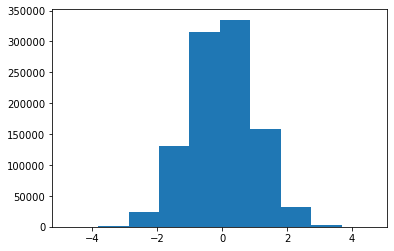

In [7]:
plt.hist(data["A"])

(array([2.80000e+01, 9.71000e+02, 1.63050e+04, 1.12490e+05, 3.14910e+05,
        3.56160e+05, 1.65452e+05, 3.13420e+04, 2.27700e+03, 6.50000e+01]),
 array([-11.18182507,  -8.71562866,  -6.24943224,  -3.78323583,
         -1.31703942,   1.149157  ,   3.61535341,   6.08154982,
          8.54774624,  11.01394265,  13.48013906]),
 <BarContainer object of 10 artists>)

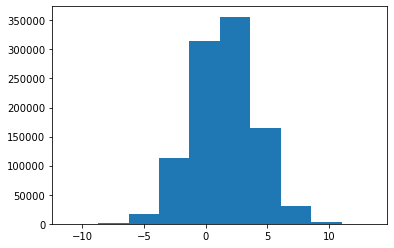

In [8]:
plt.hist(data["B"])

(array([ 99747., 100379.,  99967.,  99897., 100409.,  99999.,  99845.,
        100394.,  99493.,  99870.]),
 array([ 5.00003513,  7.7000272 , 10.40001928, 13.10001135, 15.80000342,
        18.4999955 , 21.19998757, 23.89997964, 26.59997171, 29.29996379,
        31.99995586]),
 <BarContainer object of 10 artists>)

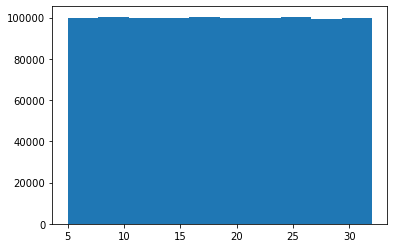

In [9]:
plt.hist(data["C"])

In [10]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [12]:
data.head()

State  Account Length  Area Code     Phone Int'l Plan VMail Plan  \
0    KS             128        415  382-4657         no        yes   
1    OH             107        415  371-7191         no        yes   
2    NJ             137        415  358-1921         no         no   
3    OH              84        408  375-9999        yes         no   
4    OK              75        415  330-6626        yes         no   

   VMail Message  Day Mins  Day Calls  Day Charge  ...  Eve Calls  Eve Charge  \
0             25     265.1        110       45.07  ...         99       16.78   
1             26     161.6        123       27.47  ...        103       16.62   
2              0     243.4        114       41.38  ...        110       10.30   
3              0     299.4         71       50.90  ...         88        5.26   
4              0     166.7        113       28.34  ...        122       12.61   

   Night Mins  Night Calls  Night Charge  Intl Mins  Intl Calls  Intl Charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   CustServ Calls  Churn?  
0               1  False.  
1               1  False.  
2               0  False.  
3               2  False.  
4               3  False.  

[5 rows x 21 columns]

In [14]:
column_names = data.columns.values.tolist()

In [15]:
a = len(column_names)
a

21

In [20]:
new_data = pd.DataFrame(
    {
        'column_names': column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }
)

In [21]:
new_data

column_names         A         B
0            State  0.430208  0.933167
1   Account Length  1.806142  0.241326
2        Area Code  0.350147  0.750886
3            Phone  1.726892  0.459042
4       Int'l Plan -0.827535  0.035894
5       VMail Plan -0.268092  0.814042
6    VMail Message  1.183684  0.664045
7         Day Mins  0.117798  0.854637
8        Day Calls -0.755361  0.960851
9       Day Charge  0.582732  0.686819
10        Eve Mins -1.125642  0.701064
11       Eve Calls  0.027159  0.909467
12      Eve Charge -2.010180  0.970273
13      Night Mins -1.298008  0.211448
14     Night Calls  0.223067  0.386892
15    Night Charge -1.002725  0.293062
16       Intl Mins -1.124286  0.862252
17      Intl Calls -1.050870  0.001941
18     Intl Charge -0.281884  0.806064
19  CustServ Calls -0.584837  0.756347
20          Churn? -1.356156  0.344017

In [22]:
new_data = pd.DataFrame(
    {
        'column_names': column_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42,42+a)
)

In [23]:
new_data

column_names         A         B
42           State  1.146157  0.982601
43  Account Length -0.646342  0.968059
44       Area Code  0.366252  0.823725
45           Phone -2.387101  0.710486
46      Int'l Plan -0.684773  0.964452
47      VMail Plan  1.161880  0.568440
48   VMail Message  0.280821  0.875878
49        Day Mins  1.548218  0.682567
50       Day Calls  0.845777  0.242573
51      Day Charge -0.015530  0.397846
52        Eve Mins -0.511099  0.782787
53       Eve Calls  0.347099  0.570282
54      Eve Charge -0.265930  0.264991
55      Night Mins -0.468072  0.029091
56     Night Calls  0.191432  0.061459
57    Night Charge  1.696792  0.407867
58       Intl Mins  0.136886  0.731470
59      Intl Calls  0.031733  0.812778
60     Intl Charge -0.775397  0.203514
61  CustServ Calls  1.167934  0.429320
62          Churn?  1.628068  0.780130